# Problems

*Created by Marcin Kaminski as part of academic coursework for Computer Infrastructure at the Atlantic Technological University (ATU).*


## Problem 1: Data from yfinance

The following function:

- downloads all hourly data for the previous five days for the five FAANG stocks.

   https://www.investopedia.com/terms/f/faang-stocks.asp

- saves the data into a folder called "data" in the root of this repository using a filename with the format "YYYYMMDD-HHmmss.csv" where "YYYYMMDD" is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and "HHmmss" is hour, minutes, seconds. 

In [1]:
# Import required libraries.

# Dates and times.
import datetime as dt # For handling dates and times. 
# Data frames.
import pandas as pd # For data manipulation and analysis. 
# Yahoo Finance data.
import yfinance as yf # For downloading financial data from Yahoo Finance. 
# Plotting.
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations.
# File system paths.
from pathlib import Path # For handling filesystem paths in an object-oriented way.


In [2]:
def get_data(days=5, interval='1h', folder='./data/'): 
    """
    This function downloads FAANG stock data and saves it to a CSV file with the following default parameters:
    - days: 5 (downloads data for the last 5 days)
    - interval: '1h' (hourly data)
    - folder: './data/' (saves the file in the 'data' folder in the root directory)
    The filename format is "YYYYMMDD-HHmmss.csv".
    """

    # Define the list of FAANG stocks.
    FAANG = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
    
    # Get the current date and time .
    now = dt.datetime.now()
    
    # Download hourly data for each FAANG stock.
    df = yf.download(FAANG, period=f'{days}d', interval=interval, auto_adjust=True)
    
    # Generate the filename with the current date and time.
    filename = folder + now.strftime("%Y%m%d-%H%M%S") + ".csv"
    
    # Save the data to a CSV file.
    df.to_csv(filename)

    return filename

In [3]:
get_data() # Call the function to download data and save it to a CSV file.

[*********************100%***********************]  5 of 5 completed


'./data/20251214-151939.csv'

In [4]:
#get_data(days=3)

## Problem 2: Plotting Data

The following function:
- opens the latest data file in the "data" folder and, on one plot, plots the "Close" prices for each of the five stocks.

- saves the plot into the "plots" folder in the root of this repository using a filename in the format YYYYMMDD-HHmmss.png.


In [5]:
def plot_data(data_folder='./data/', plots_folder='./plots/'):
    """
    Load the most recent CSV from data_folder, plot Close prices for FAANG,
    show the plot in the notebook, and save it into plots_folder.
    """
    # Define FAANG tickers.
    tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

    # Ensure folders exist.
    data_folder = Path(data_folder) # Convert to Path object.
    plots_folder = Path(plots_folder) # Convert to Path object.
    plots_folder.mkdir(parents=True, exist_ok=True) # Create plots folder if it doesn't exist.

    # Find latest CSV
    csv_files = sorted(data_folder.glob("*.csv"), key=lambda f: f.stat().st_mtime) # Sort by modification time.
    if not csv_files: # 
        raise FileNotFoundError("No CSV files found in the data folder.") # Raise error if no files found.
    latest_file = csv_files[-1] # Get the most recent file.

    # Load yfinance multi-index CSV
    df = pd.read_csv(latest_file, header=[0,1], index_col=0, parse_dates=True) # Read CSV with multi-index columns.

    # Extract Close prices for available tickers
    available = [t for t in tickers if t in df['Close'].columns] # Check available tickers.
    close_df = df['Close'][available] # Get Close prices.

    # Ensure we have rows
    close_df = close_df.dropna(how='all') # Drop rows where all values are NaN.
    if close_df.shape[0] == 0: # Check if any data is left.
        raise ValueError( # Raise error if no data available.
            "No usable price data found. "
            "Re-run get_data() with more days (e.g., days=10)."
        )

    # --- Create plot ---
    plt.figure(figsize=(12, 6)) # Set figure size.
    for t in available: # Loop through available tickers.
        plt.plot(close_df.index, close_df[t], label=t) # Plot each ticker's Close price.

    plt.xlabel("Time") # Set x-axis label.  
    plt.ylabel("Close Price (USD)") # Set y-axis label.
    plt.legend() # Show legend.

    title_date = pd.to_datetime(close_df.index[-1]).strftime("%Y-%m-%d %H:%M:%S") # Format title date.
    plt.title(f"FAANG Close Prices — {title_date}") # Set plot title.

    # --- Save plot ---
    timestamp = dt.datetime.now().strftime("%Y%m%d-%H%M%S") # Current timestamp for filename.
    plot_path = plots_folder / f"{timestamp}.png" # Define plot file path.
    plt.savefig(plot_path, dpi=200, bbox_inches='tight') # Save plot to file.

    # --- Show plot in notebook ---
    plt.show() # Display the plot.

    # Close figure to free memory
    plt.close() # Close the plot.

    return str(plot_path) # Return the path to the saved plot.

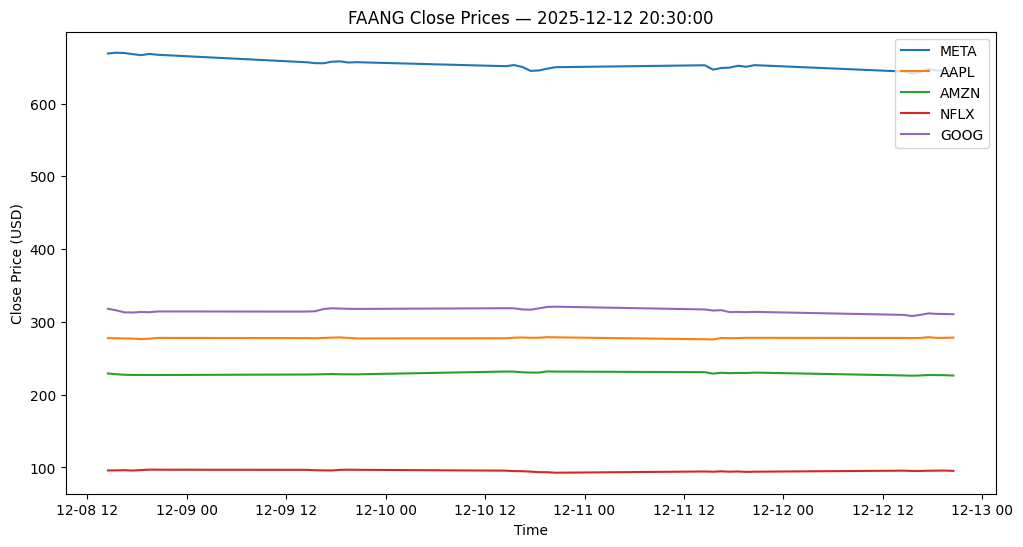

Saved to: plots/20251214-151940.png


In [6]:
file = plot_data() # Call the function to plot data.
print("Saved to:", file) # Print the path where the plot was saved.

## Problem 3: Script

The following Python script called *faang.py* runs the above functions *get_data()* and *plot_data()* downloading the FAANG stocks data and creating the plot of Close prices for each of the five stocks.


[Open faang.py](faang.py)

## Problem 4: Automation

The following GitHub Actions workflow called *faang.yml* runs the above Python script *faang.py* every Saturday morning.

[Raw faang.yml workflow](https://github.com/Glogover/computer-infrastructure/blob/main/.github/workflows/update-data.yml)

## End